In [11]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [12]:
"""
Goal: generate a matrix of random values (w) that we will make
random data points conform to. Define global variables batch_size
and features which will be the dimensions of later matrices, and
our implementation of the sigmoid function for later use.
Note no bias term (b) in this one!!
"""
batch_size = 128
features = 5
w = np.random.randn(features,1) #w is a matrix now

print(w)

[[-0.54598188]
 [-0.55992399]
 [-1.86883051]
 [-0.33052039]
 [-0.17887303]]


In [13]:
def sigmoid(x): #define sigmoid fn for later
    p = 1/(1+np.exp(-x)) #use np.exp and not tf.exp!
    return p

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

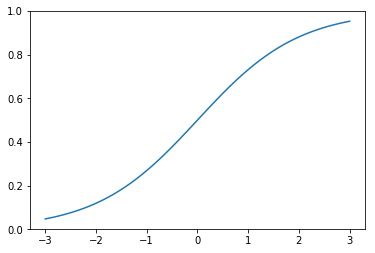

In [14]:
#visualize sigmoid function
xx = np.linspace(-3,3,100) # min, max, #
print(xx)
plt.plot(xx,sigmoid(xx))
plt.show()

In [15]:
"""
Generate a matrix of random x values of size (batch_size,features).
Our p values are generated by running the dot product of each x
value and w through the sigmoid function. We then compare each p
value to a randomly generated sample from the distribution located
in the rand_samples matrix of size (batch_size,1). We generate the
values for y_data based on the comparison of each p value in the p
matrix to the corresponding random value in the rand_samples matrix.
If the p value is > the random value, the y_data value for the [i]th
value in the matrix is a 1, and otherwise it's a 0. We vectorize this
process by displaying the boolean (p>random_samples) as a float, since
True and False have corresponding float values.
"""
def gen_data(w, batch_size, features):
    x_data = np.random.rand(batch_size,features)
    p = sigmoid(np.dot(x_data,w))
    rand_samples = np.random.rand(batch_size,1)
    y_data = (p>rand_samples).astype('float')
#     y_data = np.empty_like(p) #unvectorized
#     for i in range(batch_size): 
#         if p[i] > rand_samples[i]:
#             y_data[i] = 1
#         else:
#             y_data[i] = 0
    return x_data,y_data

In [16]:
"""
Here we're just printing out w for later reference and the output of
our data generation function to make sure it came out as anticipated.
Note that x_data is a matrix of size (batch_size,features) and y_data
is just a one-column vector of ones and zeros.
"""
print(w)
print(gen_data(w, batch_size, features))

[[-0.54598188]
 [-0.55992399]
 [-1.86883051]
 [-0.33052039]
 [-0.17887303]]
(array([[  5.11404743e-01,   1.33365675e-01,   1.59127191e-01,
          2.52534223e-01,   9.89130741e-01],
       [  8.03403694e-01,   9.19308382e-01,   2.22367416e-01,
          6.50620363e-01,   1.07476973e-01],
       [  8.90040723e-01,   5.15057566e-01,   9.87727400e-01,
          2.80658200e-01,   8.18198839e-01],
       [  9.97859779e-01,   6.82259110e-01,   1.58757283e-01,
          2.35767989e-01,   9.65999173e-01],
       [  8.55791394e-01,   5.92469463e-02,   8.18771586e-01,
          4.91501877e-01,   4.92874912e-01],
       [  8.20551285e-01,   2.07289760e-01,   5.34388262e-01,
          2.52820355e-02,   1.50525758e-01],
       [  5.60742526e-01,   3.99978915e-01,   3.02758303e-01,
          6.49410836e-01,   7.87056929e-02],
       [  6.95368302e-01,   6.63864231e-02,   5.85720297e-01,
          3.41892281e-01,   7.08344969e-01],
       [  6.90543591e-01,   6.15090487e-01,   3.13001962e-02,
     

In [17]:
"""
Now we're building the logistic regression and defining the graph in
TensorFlow. We create placeholder values for x and y and a variable for
w_hat. Note that instead of y_hat we have p_hat for easier understanding.
The p_hat is equal to our p values from earlier, so we run x and w_hat
through a sigmoid function again. (Note the use of tf.exp instead of np.exp
because we want this to be a Tensor object. Similar reasoning is for the
usage of tf.matmul instead of np.dot.) Our loss function is binary cross
entropy, again making sure to use TensorFlow functions instead of NumPy ones
to make sure they're Tensor objects. We use GradientDescentOptimizer and tell
it the learning rate and that we want to minimize the loss value we've already
calculated. Finally, we instantiate the global_variable_initializer object as
init.
"""
tf.reset_default_graph() #gets rid of yelling about reinitializing w_hat

x = tf.placeholder(tf.float32, shape=(batch_size,features))
y = tf.placeholder(tf.float32, shape=(batch_size,1))

w_hat = tf.get_variable("w_hat", shape=(features,1), initializer=tf.random_normal_initializer(0,0.5))

p_hat = 1/(1+tf.exp(-tf.matmul(x,w_hat)))

loss = tf.reduce_mean(-(y*tf.log(p_hat)+(1-y)*tf.log(1-p_hat))) #binary cross entropy

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

init = tf.global_variables_initializer()

In [18]:
"""
Now we run the Session to actually perform the logistical regression. We
run the process for 50000 steps (training this takes a while!). For each
iteration we use the gen_data function to generate our x_data and y_data
values and feed them into the optimizer using feed_dict. We print out the
loss every 1000 iterations. Finally when training is finished we print out
our w_hat value and w and see how well the algorithm trained.
"""
with tf.Session() as sess:
    sess.run(init)
    for i in range(50000):
        x_data, y_data = gen_data(w,batch_size,features)
        _ = sess.run(optimizer, feed_dict={x: x_data, y: y_data})
        if np.mod(i,1000) == 0:
            print(sess.run(loss, feed_dict={x: x_data, y: y_data}))
    print(sess.run([w_hat]))

0.68469
0.56949
0.523144
0.48899
0.457715
0.493027
0.390174
0.473871
0.420927
0.445822
0.452493
0.459986
0.358207
0.487598
0.456734
0.525264
0.448768
0.395647
0.425296
0.354327
0.422936
0.435064
0.46357
0.397051
0.386766
0.418259
0.4789
0.417414
0.406806
0.334768
0.446186
0.390087
0.372988
0.396843
0.448752
0.483233
0.519953
0.360697
0.420161
0.375
0.448576
0.515174
0.428433
0.380646
0.442181
0.472925
0.467345
0.401196
0.447652
0.344738
[array([[-0.53909153],
       [-0.42866266],
       [-1.47188735],
       [-0.54362494],
       [-0.44398353]], dtype=float32)]
[[-0.54598188]
 [-0.55992399]
 [-1.86883051]
 [-0.33052039]
 [-0.17887303]]


In [19]:
# Compare with the actual values in we started with
# It's gotten much closer
print(w)

[[-0.54598188]
 [-0.55992399]
 [-1.86883051]
 [-0.33052039]
 [-0.17887303]]
